<a href="https://colab.research.google.com/github/Francisco-Alfredo/Data-Analysis-/blob/master/Projeto_An%C3%A1lise_de_Mercado_de_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
base_dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

In [32]:
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [33]:
base_dados.shape

(1034, 9)

In [34]:
base_dados.isnull().sum()

,0
Game,0
Year,209
Genre,0
Publisher,209
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


<Axes: title={'center': 'Valores nulos'}>

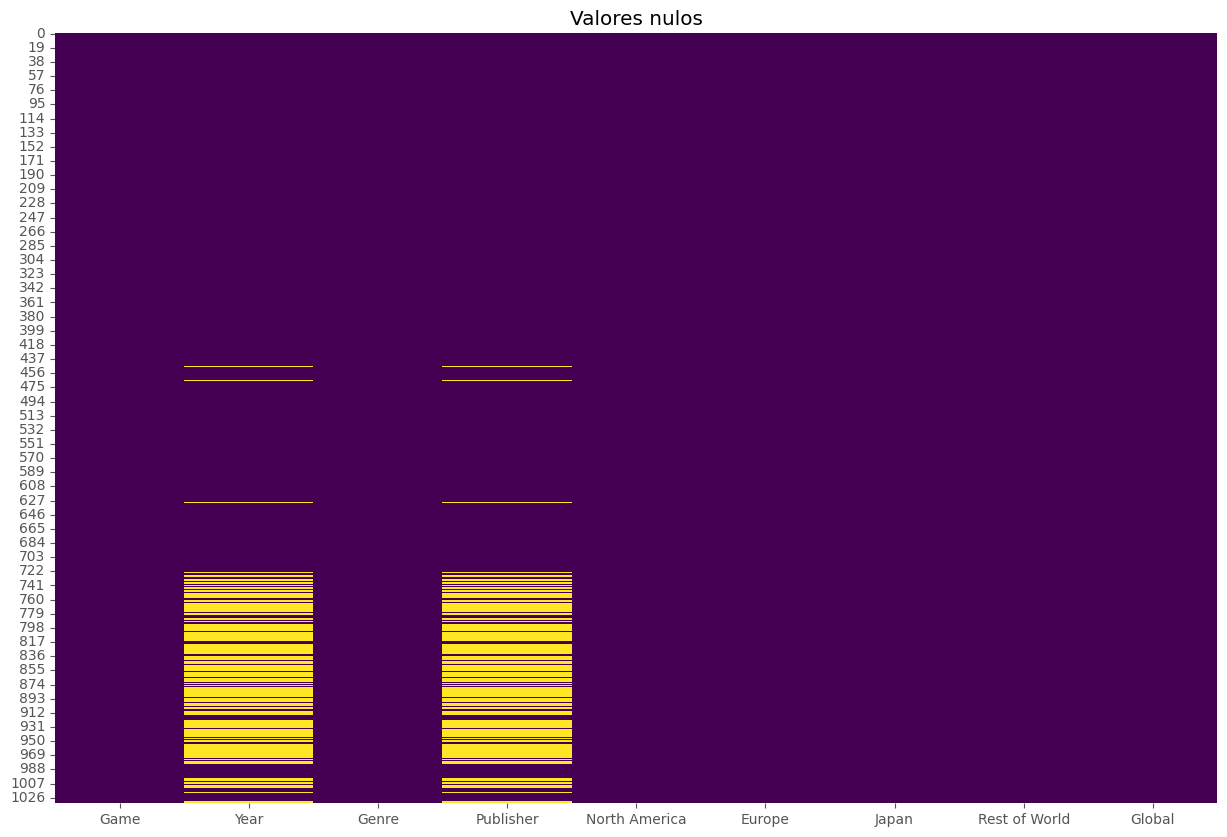

In [35]:
plt.figure(figsize=(15,10))
plt.title('Valores nulos')
sns.heatmap(base_dados.isnull(), cbar=False, cmap='viridis')
#sns.barplot(base_dados.isnull())

In [36]:
base_dados.dropna(inplace=True)

In [37]:
base_dados.shape

(825, 9)

In [38]:
#Estatística da base
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


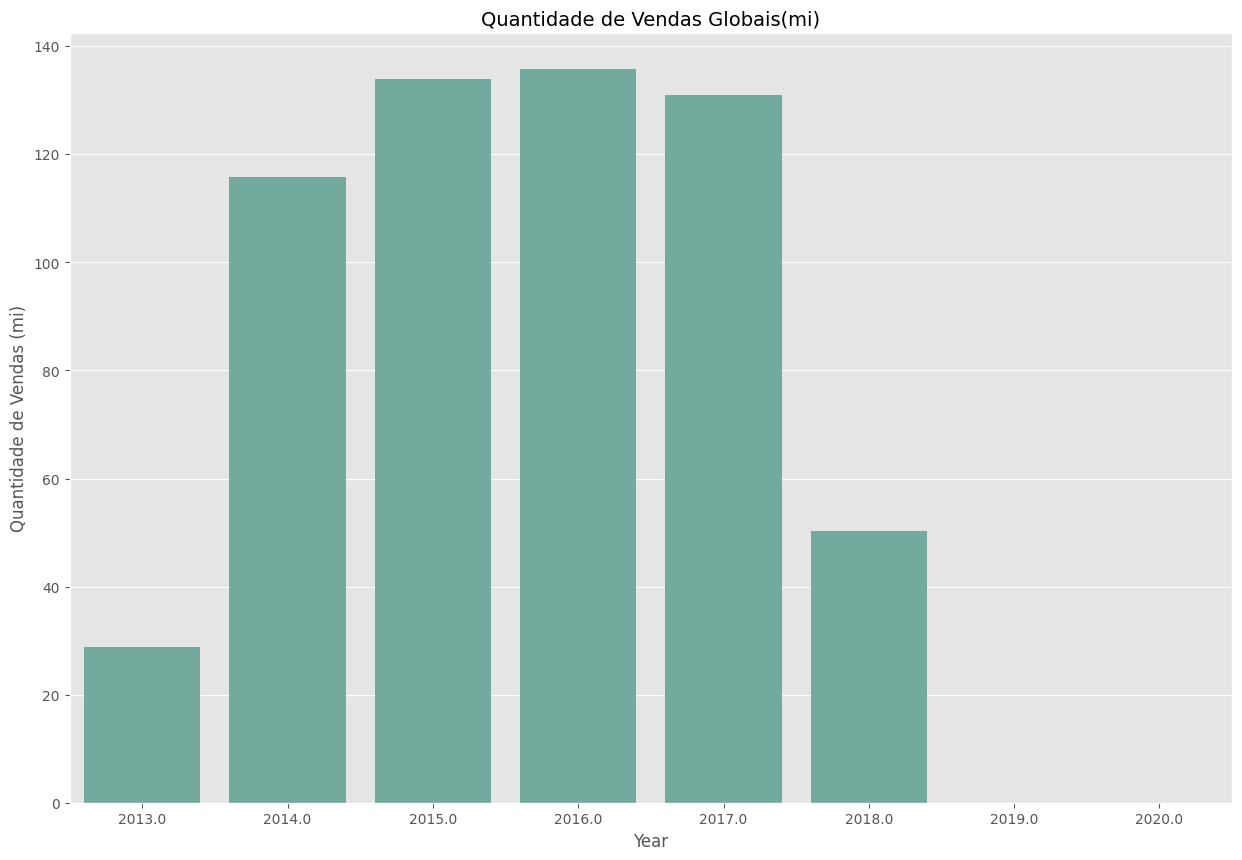

In [39]:
#Tamanho da imagem
plt.figure(figsize=(15,10))

#Título
plt.title('Quantidade de Vendas Globais(mi)', loc='center', fontsize=14)

#Gráfico
sns.barplot(data=base_dados, x='Year', y='Global', errorbar=None, color='#69b3a2', estimator='sum')

#Label do eixo y
plt.ylabel('Quantidade de Vendas (mi)');

In [40]:
#Retirar os anos 2019 e 2020
base_dados = base_dados[base_dados['Year'] != 2019]
base_dados = base_dados[base_dados['Year'] != 2020]
#

In [41]:
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


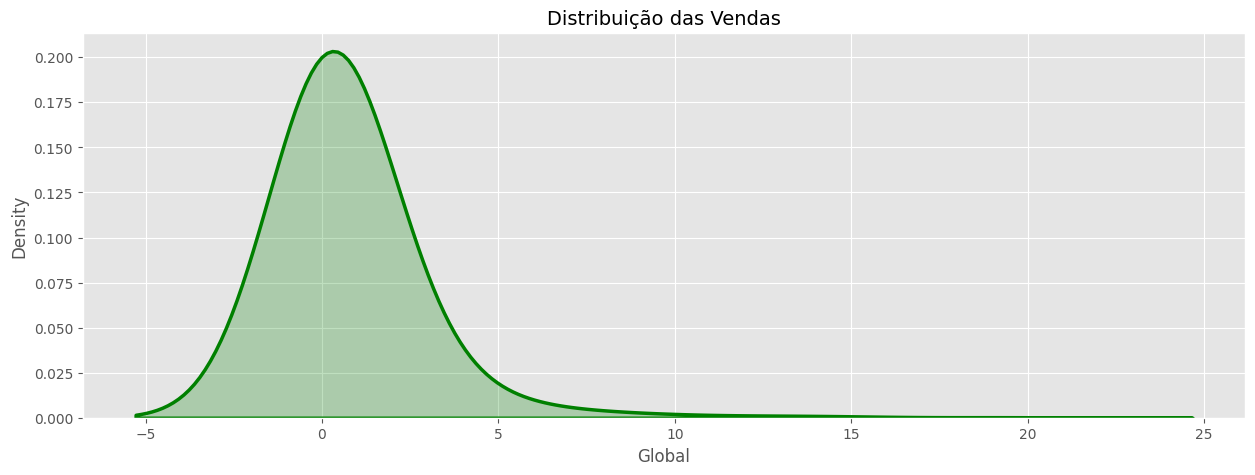

In [42]:
#Verificando a densidade dos dados na base

#Tamanho da imagem
plt.figure(figsize=(15, 5))

#Estilo do gráfico
plt.style.use('ggplot')

#Título
plt.title('Distribuição das Vendas', loc='center', fontsize=14)

#Plotagem do gráfico
sns.kdeplot(base_dados['Global'], fill=True, bw_method=1, color='g', linewidth=2.5);


In [43]:
#Distribuição das vendas por ano
#Remover as colunas categoricas do agrupamento
base_dados.groupby(by=['Year']).sum().drop(['Game', 'Genre', 'Publisher'], axis=1)

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


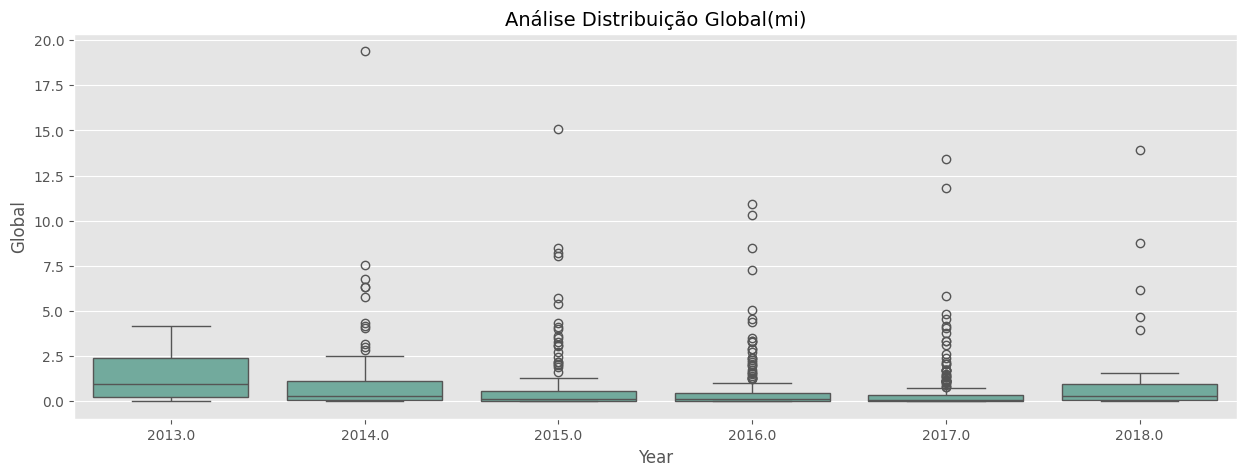

In [44]:
#Tamanho
plt.figure(figsize=(15,5))

#Título
plt.title('Análise Distribuição Global(mi)', loc='center', fontsize=14)

#Gráfico
sns.boxplot(data=base_dados, x='Year', y='Global', color='#69b3a2')

#Label do eixo y
plt.ylabel('Global');

In [45]:
#Jogos que venderam igual ou acima de 10 mi no mercado global
base_dados[base_dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [46]:
#analise = base_dados
analise = base_dados
#analise.head()

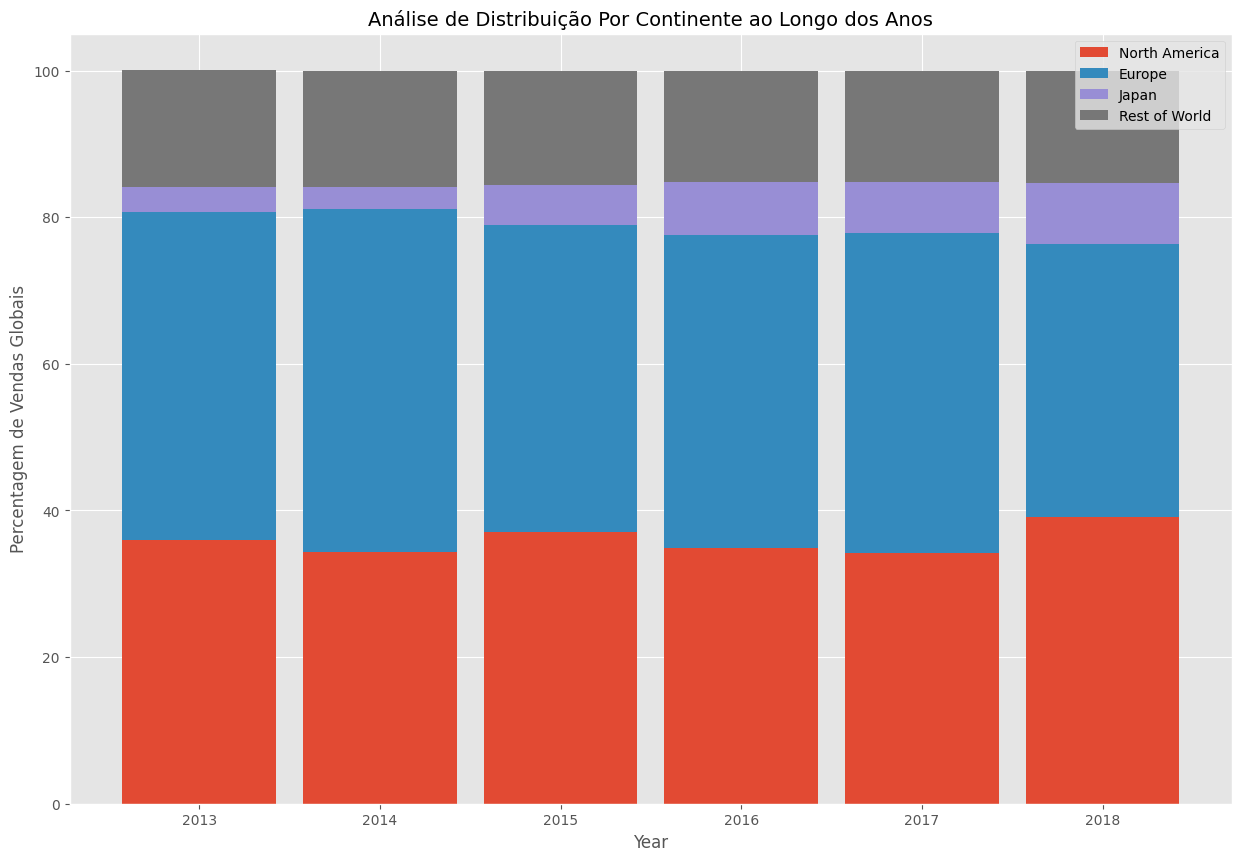

In [47]:
#Agrupando por Ano e Total as vendas por Região
sales_by_year = analise.groupby('Year')[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].sum()

#Calculando o percentual de Vendas por Ano para cada Região
sales_by_year['America_Percentage'] = (sales_by_year['North America'] / sales_by_year['Global']) * 100
sales_by_year['Europe_Percentage'] = (sales_by_year['Europe'] / sales_by_year['Global']) * 100
sales_by_year['Japan_Percentage'] = (sales_by_year['Japan'] / sales_by_year['Global']) * 100
sales_by_year['Rest_of_World_Percentage'] = (sales_by_year['Rest of World'] / sales_by_year['Global']) * 100

#Plotando o gráfico de barra empilhada
plt.figure(figsize=(15, 10))
plt.title('Análise de Distribuição Por Continente ao Longo dos Anos', loc='center', fontsize=14)

bar_width = 0.85

plt.bar(sales_by_year.index, sales_by_year['America_Percentage'], width=bar_width, label='North America')
plt.bar(sales_by_year.index, sales_by_year['Europe_Percentage'], width=bar_width, bottom=sales_by_year['America_Percentage'], label='Europe')
plt.bar(sales_by_year.index, sales_by_year['Japan_Percentage'], width=bar_width, bottom=sales_by_year['America_Percentage'] + sales_by_year['Europe_Percentage'], label='Japan')
plt.bar(sales_by_year.index, sales_by_year['Rest_of_World_Percentage'], width=bar_width, bottom=sales_by_year['America_Percentage'] + sales_by_year['Europe_Percentage'] + sales_by_year['Japan_Percentage'], label='Rest of World')

plt.xlabel('Year')
plt.ylabel('Percentagem de Vendas Globais')
plt.legend()
plt.show()

In [48]:
base_dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [51]:
#Convertendo valores categóricos Publisher, Genre e Game para número
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

#Funcao_Label.fit_transform(base_dados['Publisher'])

base_dados['Produtor'] = Funcao_Label.fit_transform(base_dados['Publisher'])
base_dados['Genero'] = Funcao_Label.fit_transform(base_dados['Genre'])
base_dados['Jogo'] = Funcao_Label.fit_transform(base_dados['Game'])

In [52]:
base_dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,121,0,72
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,121,8,802
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00,34,2,107
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00,17,0,114


In [55]:
paleta_cores = sns.color_palette('bright', 8)
paleta_cores

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098)]

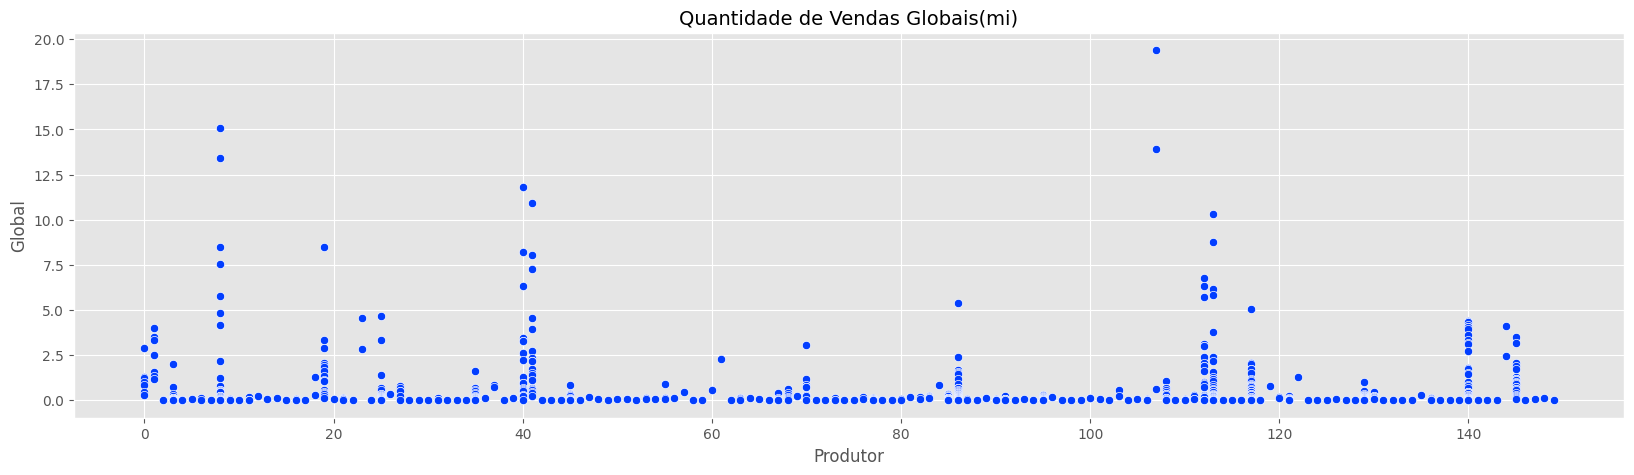

In [82]:
plt.figure(figsize=(20,5))
plt.title('Quantidade de Vendas Globais(mi)', loc='center', fontsize=14)
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[0]);

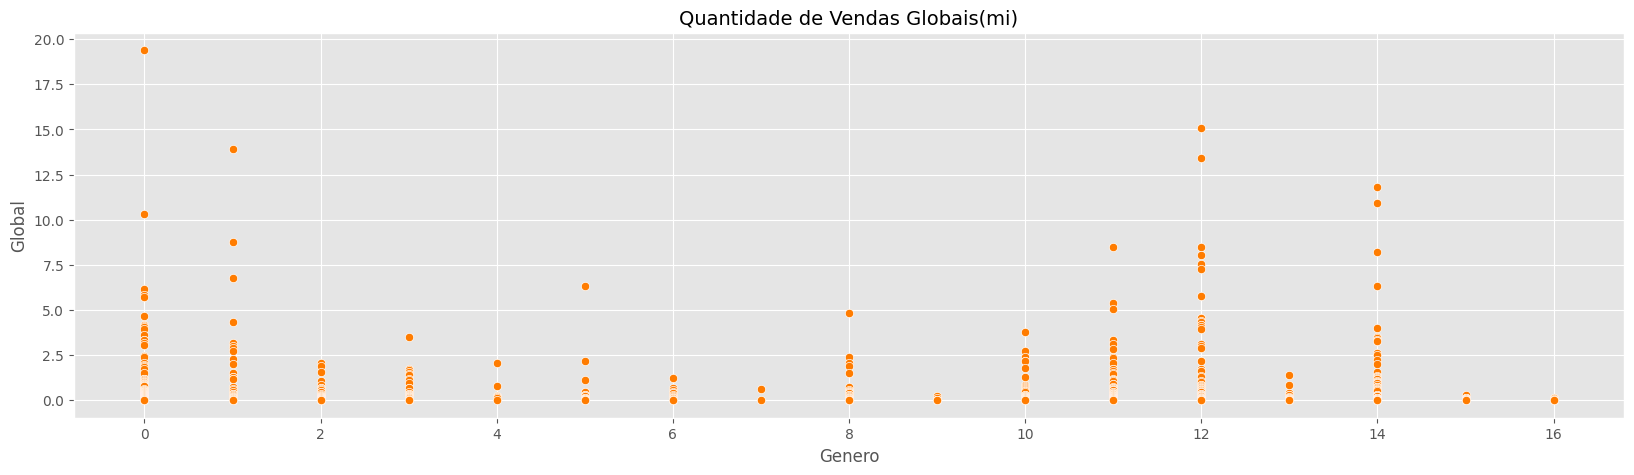

In [81]:
plt.figure(figsize=(20,5))
plt.title('Quantidade de Vendas Globais(mi)', loc='center', fontsize=14)
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[1]);

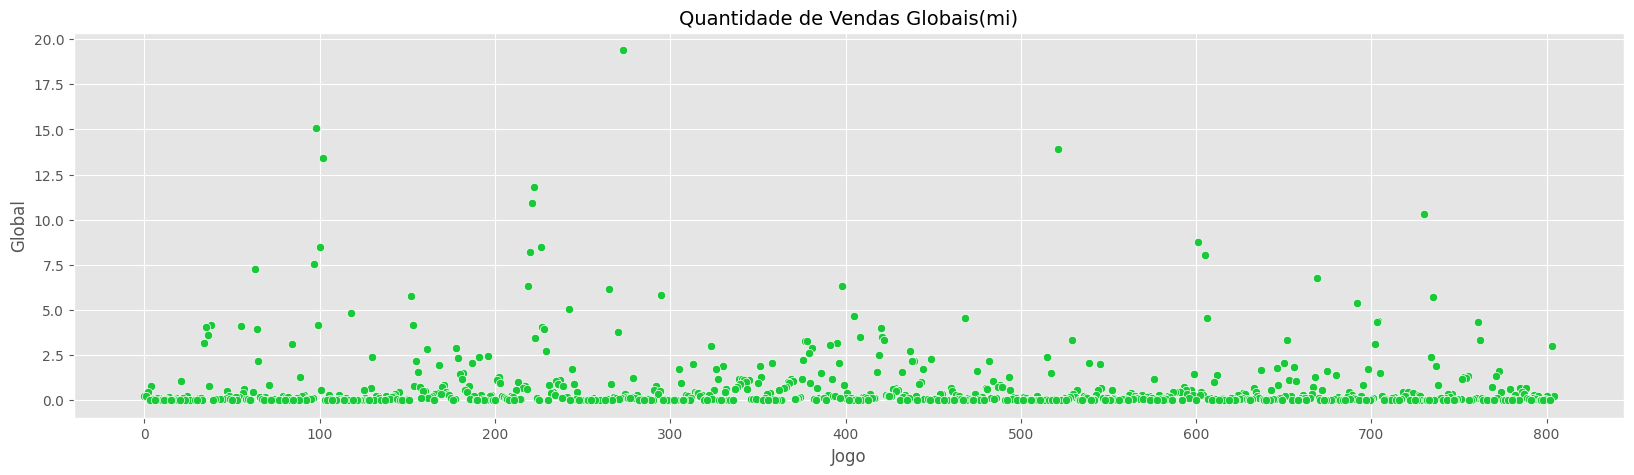

In [79]:
plt.figure(figsize=(20,5))
plt.title('Quantidade de Vendas Globais(mi)', loc='center', fontsize=14)
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[2]);